Rafael Beltrán Hernández

In [4]:
import stressTransformations as st
import numpy as np
import matplotlib.pyplot as plt

# Mecanismo de dos ejes

En primer lugar, se tienen que encontrar las reacciones en A y D. Junto con el comportamiento de los mecanismos en la transmisión. Para esto último, se calcula el _Gear Ratio_, el cual corresponde al cociente entre los radios de los engranajes. Entonces $R=2$. El torque entonces en el engranaje inferior corresponde a $T_2 =  (R)T_1 = 200 Nm$. También, la fuerza tangencial del sistema de transmisión es de $F_t = T/r = 1600 N$. Por geometría, los valores de fuerza en la componente $y$ y $z$ del sistema de engranajes se relaciona con el ángulo de presión mediante:
\begin{equation}
    C_y = F_t \sin{\phi} - N \cos{\phi} \\
    C_z = F_t \cos{\phi} + N \sin{phi}
\end{equation}
Donde $N=F_t \tan{\phi}$. Ahora bien, para garantizar el equilibrio de torques en la catarina y el engranaje, la carga $P$ equivale a:
\begin{equation}
    P = \frac{200}{0.075} = 2666.67
\end{equation}
Con el fin de encontrar las reacciones en los soportes A y D (los cuales tienen dos componentes, una en $y$, la otra en $z$) se plantean las siguientes cuatro ecuaciones:
\begin{equation}
    \sum M_{A_y} = 0 \\
    \sum M_{A_z} = 0 \\
    \sum F_y = 0 \\
    \sum F_z = 0

    
\end{equation}

Ahora se resolverán las ecuaciones.


In [42]:
import sympy as sp
# Distancias
phi = np.radians(20)
e = 75/1000
f = 250/1000
g = 0.125
# Fuerzas 
P = 8000/3
ft = 1600
N = ft*np.tan(phi)
Cy = abs(ft*np.sin(phi) - N*np.cos(phi))
Cz = ft*np.cos(phi) + N*np.sin(phi)
# Declaración de variables simbólicas
ay, az, dy, dz = sp.symbols('ay az dy dz')
# Ecuaciones
e1 = dz*(e+f+g) + (e+f)*(Cz) # Sumatoria de momentos centrados en A en el eje y igualada a cero
e2 = -e*P + (e+f+g)*(dy) - (e+f)*(Cy) # Sumatoria de momentos centrados en A en el eje z igualada a cero
e3 = ay - P - Cy + dy # sumatoria de fuerzas y
e4 = az + Cz + dz # Sumatoria de fuerzas z
# Resolución de ecuaciones
sol = sp.nsolve((e1,e2,e3,e4),(ay,az,dy,dz),(1,1,1,1))
Ay , Az , Dy, Dz = [float(i) for i in sol]
sol

Matrix([
[ 2222.22222222222],
[-472.967898878183],
[ 444.444444444444],
[-1229.71653708328]])

La lista impresa son las reacciones en A y Z en las componentes $z$ y $y$. Ahora, se contruyen los diagramas de momento y cortante en los ejes en cuestión. Comenzando primero por el eje $y$.

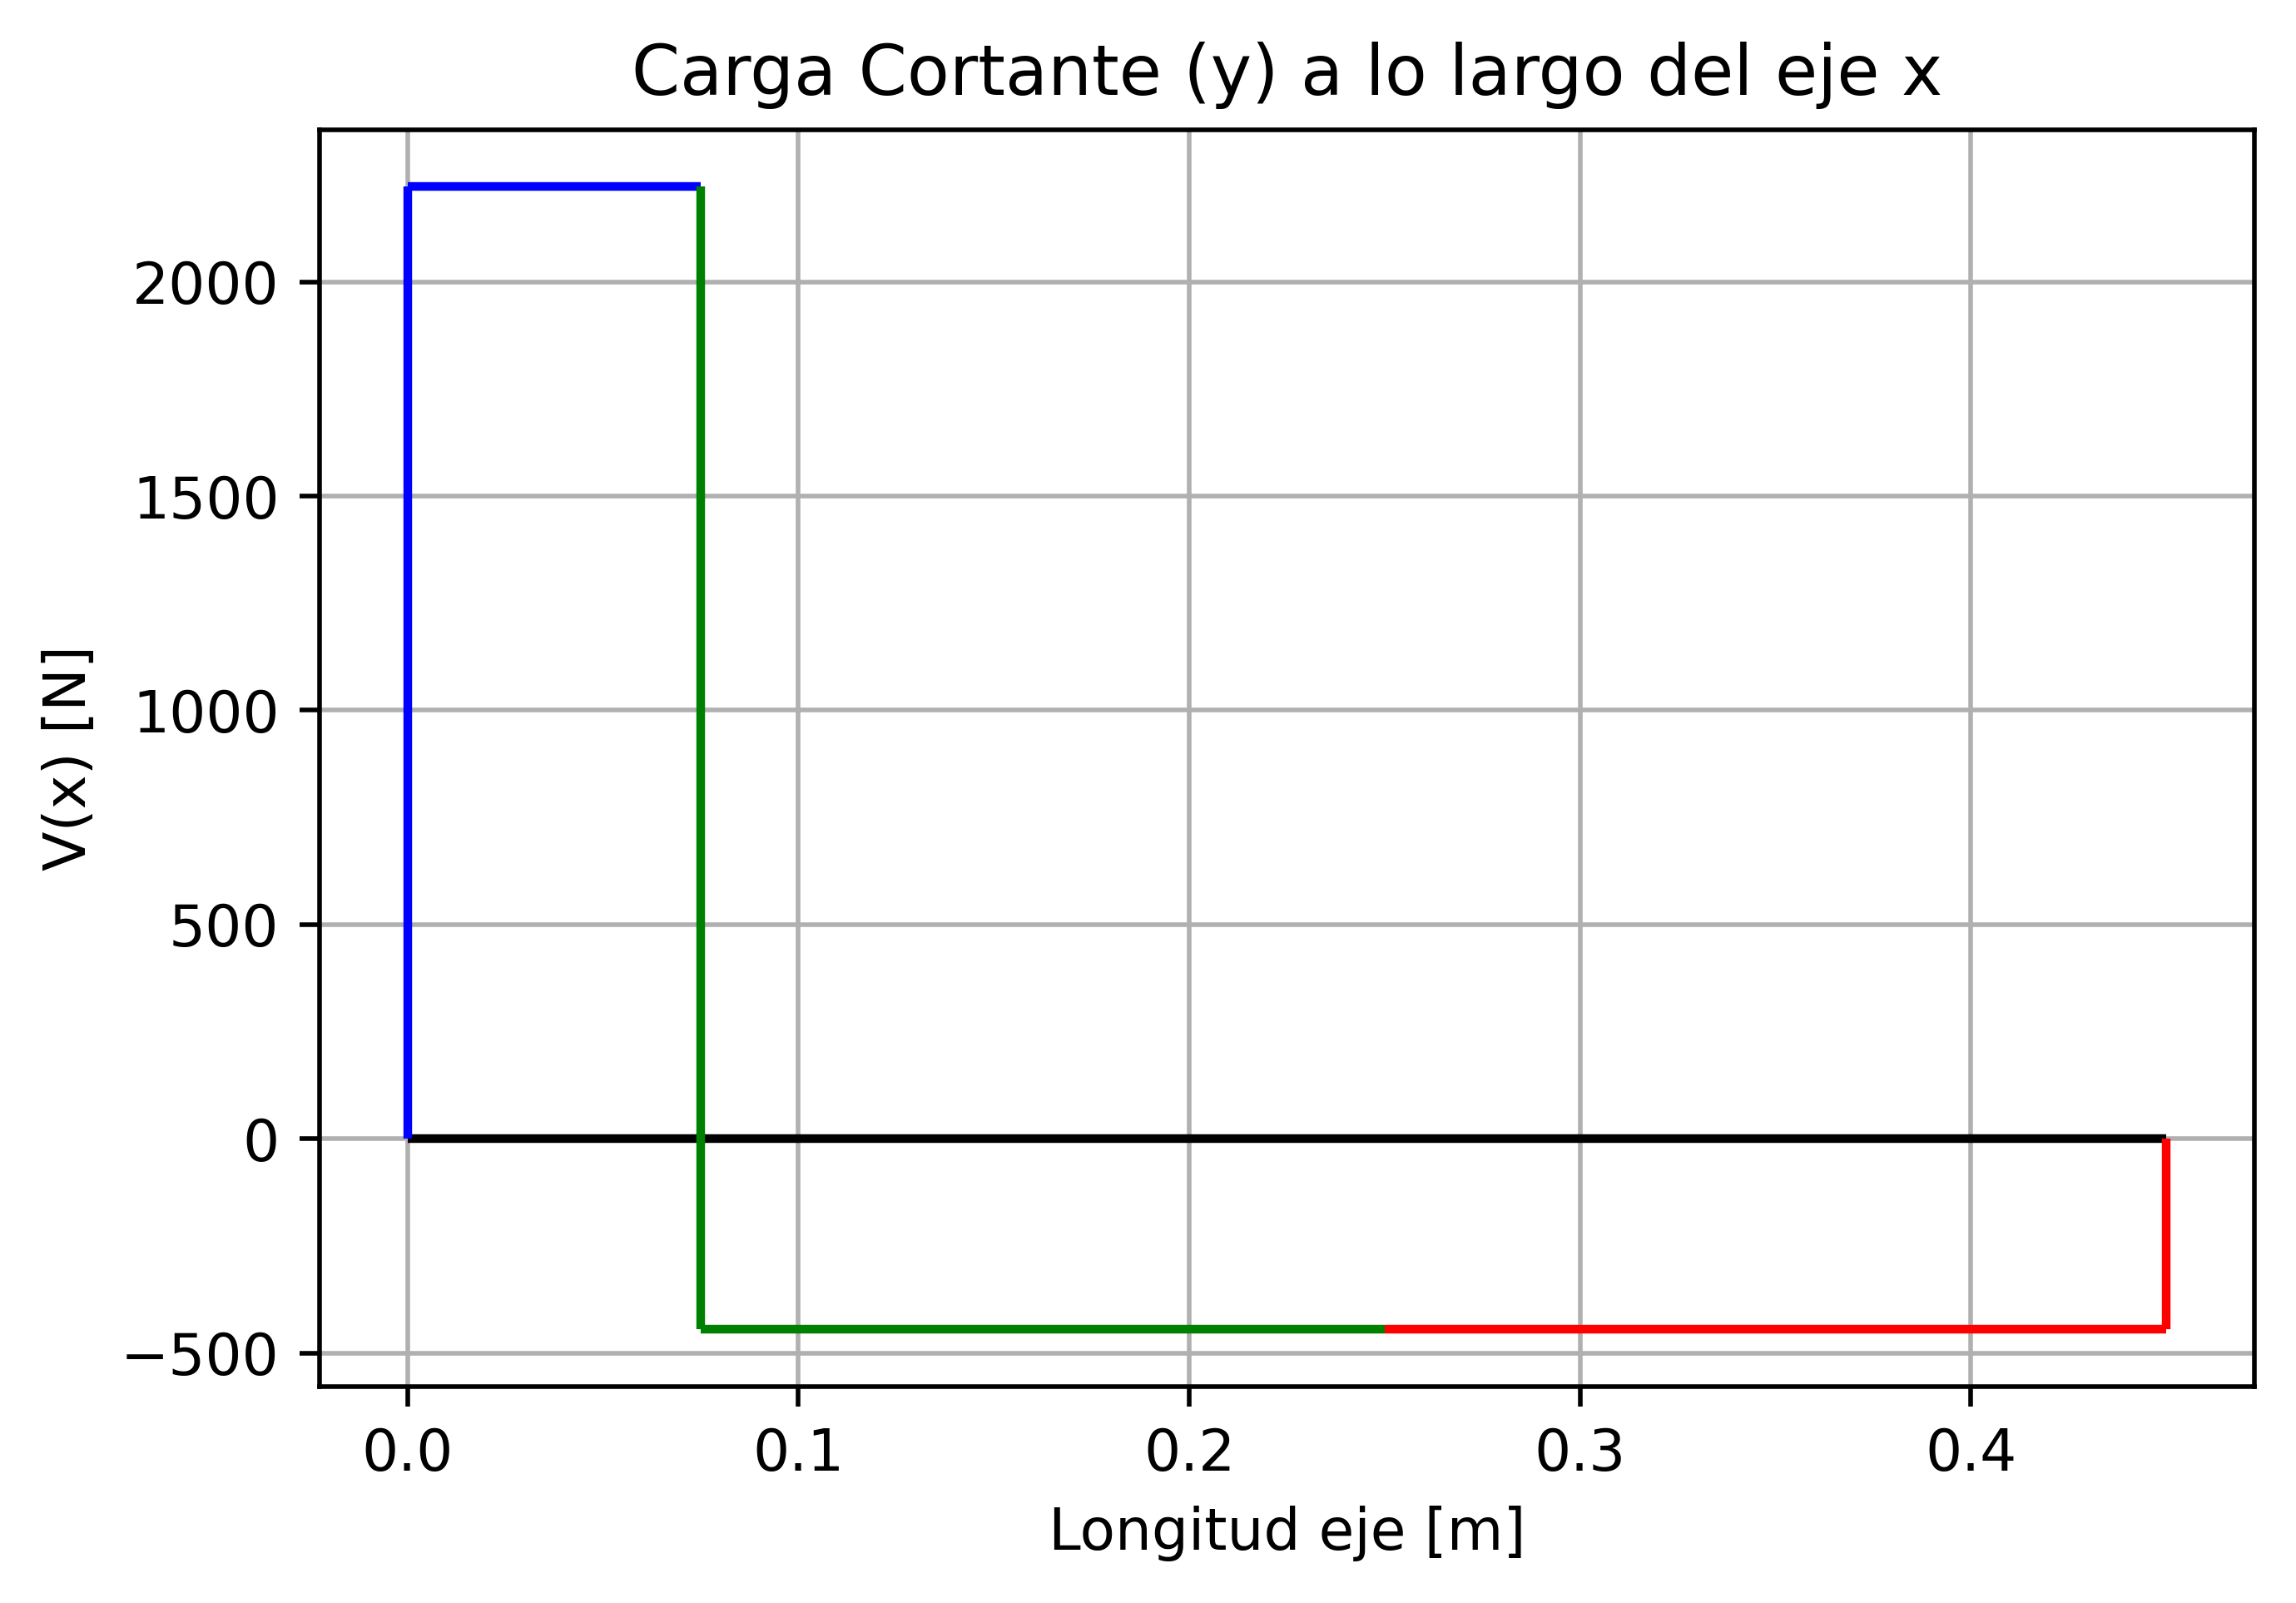

In [43]:
plt.figure(dpi=500)
plt.grid(True)
plt.hlines(0,0,(e+f+g),'k')
plt.vlines(0,0,Ay,'b')
plt.hlines(Ay,0,e,'b')
plt.vlines(e,Ay - P,Ay,'g')
plt.hlines(Ay-P,e,f,'g')
plt.vlines(e+f,Ay-P,Ay-P-Cy)
plt.hlines(Ay-P-Cy,f,e+f+g,'r')
plt.vlines(e+f+g,Ay-P-Cy,Ay-P-Cy+Dy,'r')
plt.title('Carga Cortante (y) a lo largo del eje x')
plt.xlabel('Longitud eje [m]')
plt.ylabel('V(x) [N]')
plt.show()

En un procedimiento similar, encontramos el diagrama de carga cortante en relación al eje $z$

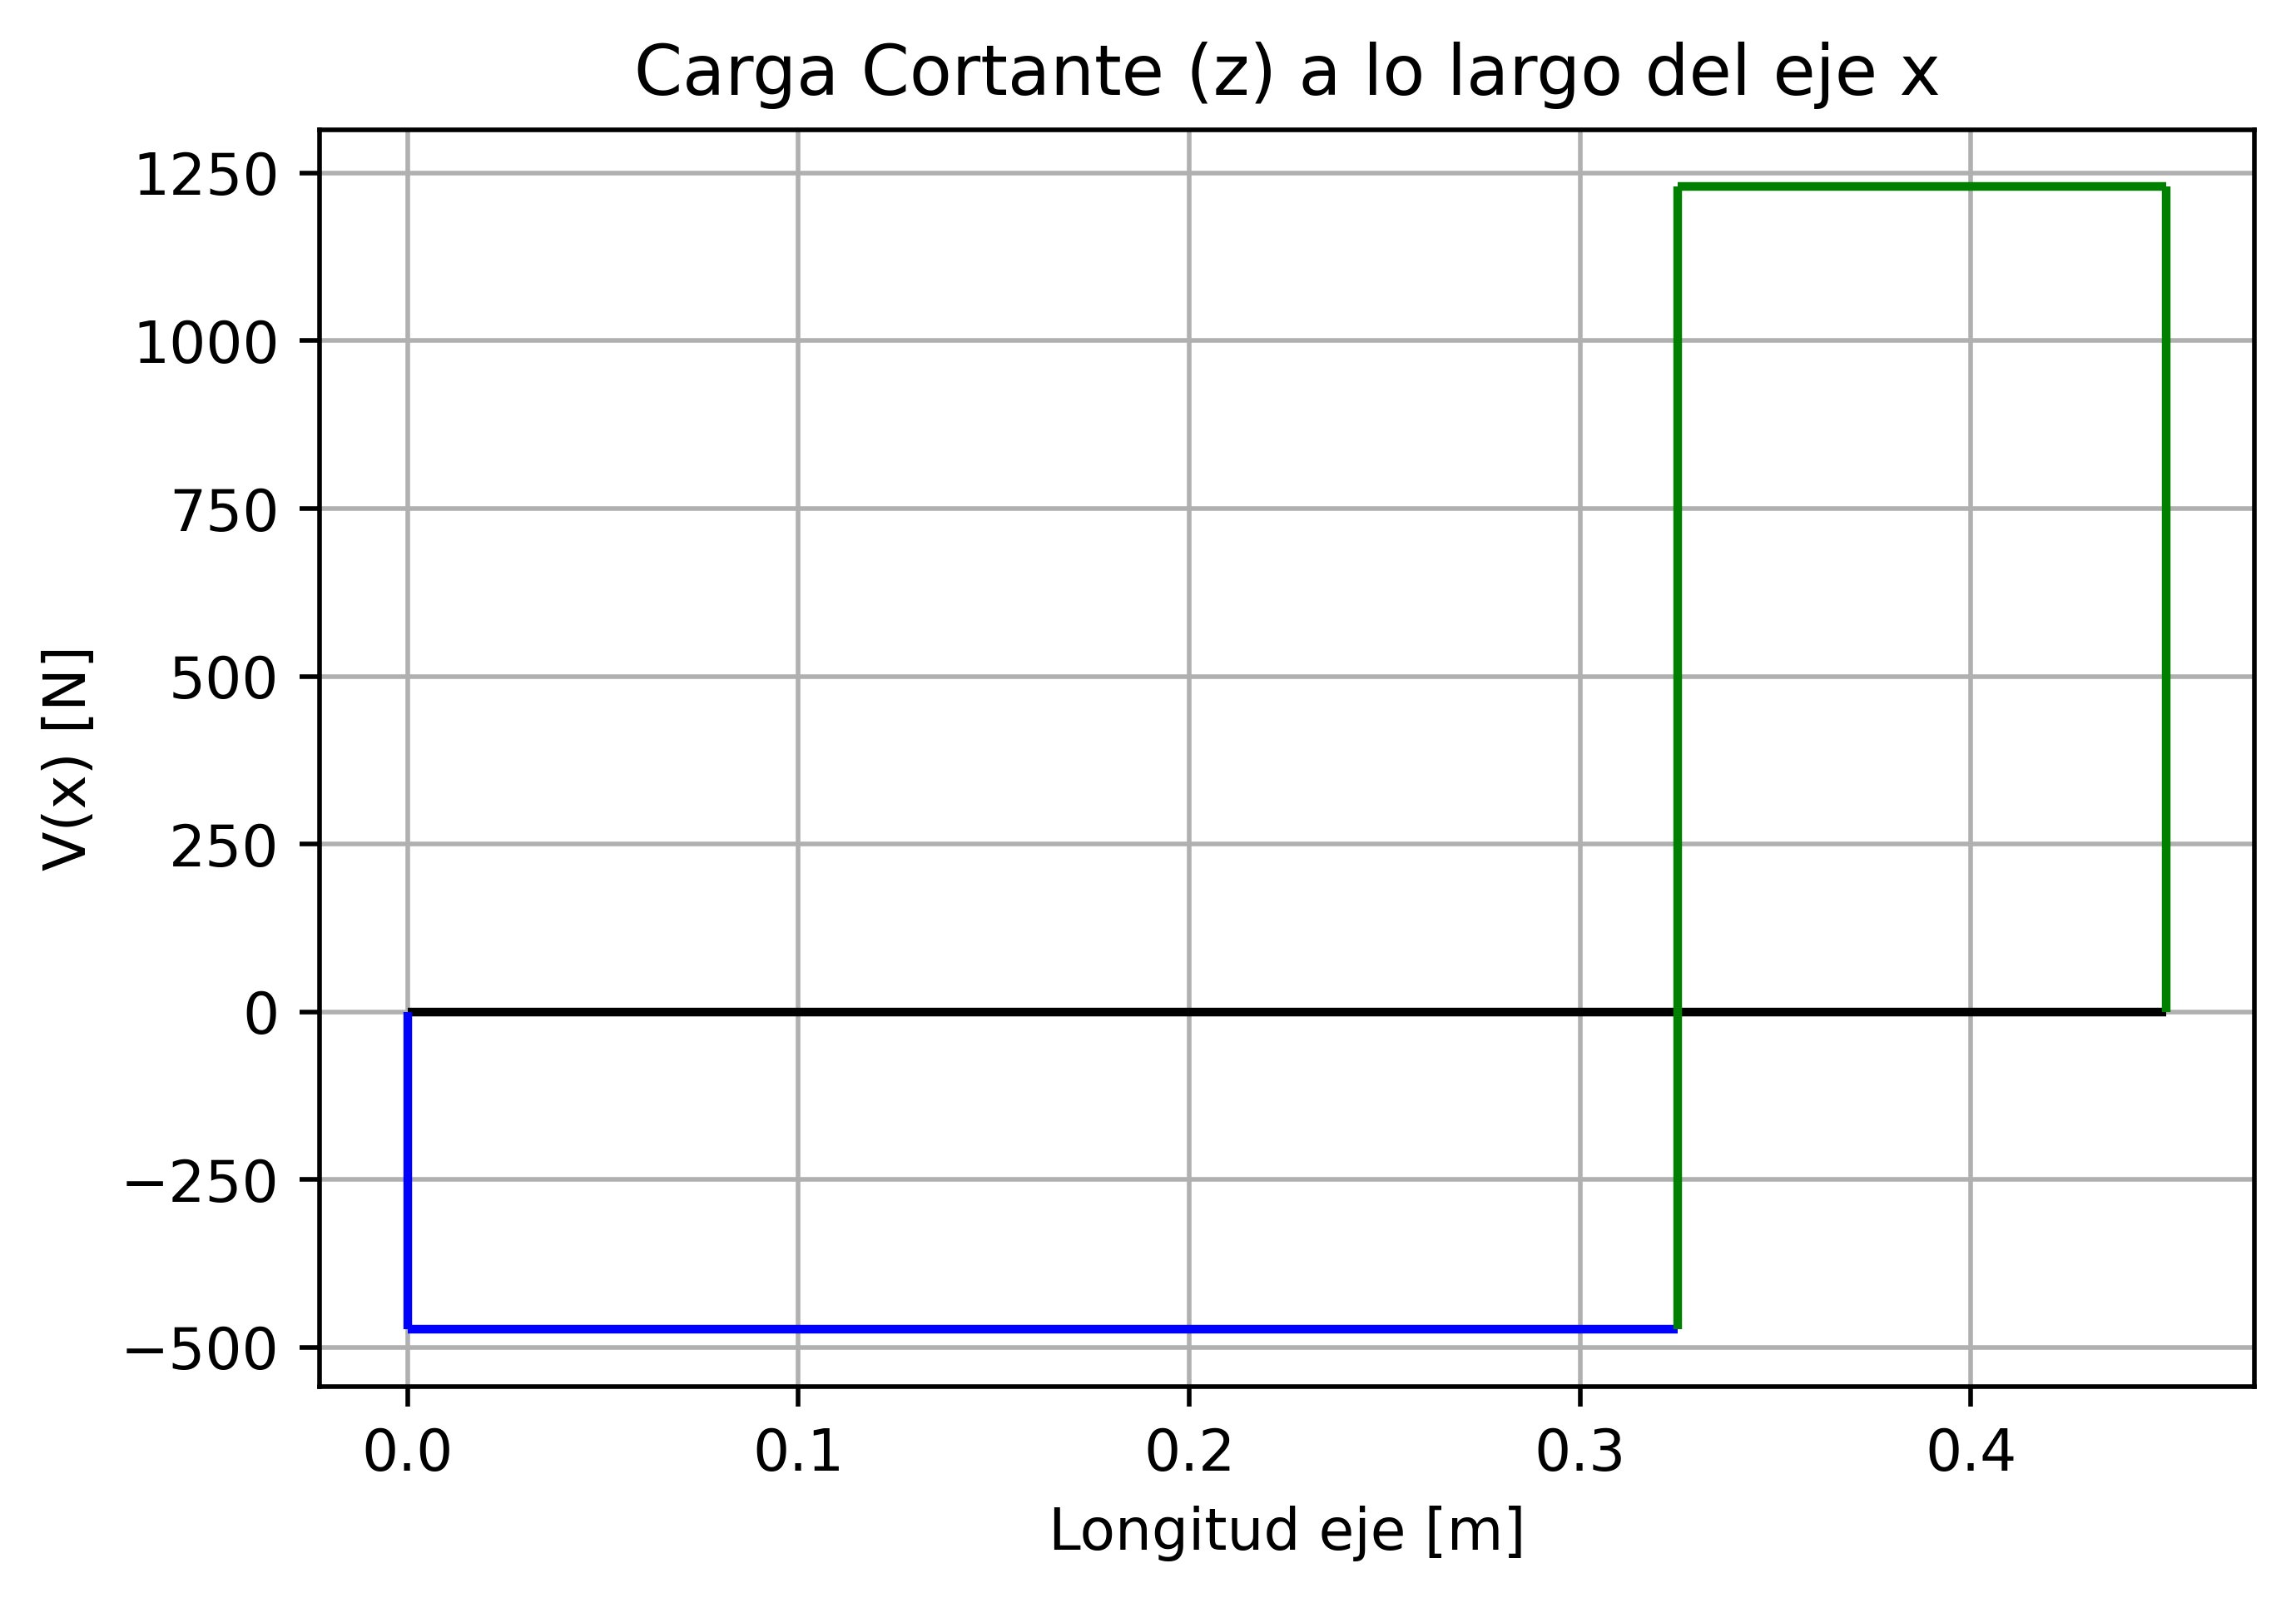

In [47]:
plt.figure(dpi=500)
plt.grid(True)
plt.hlines(0,0,(e+f+g),'k')
plt.vlines(0,0,Az,'b')
plt.hlines(Az,0,e+f,'b')
plt.vlines(e+f,Az,Az+Cz,'g')
plt.hlines(Az+Cz,e+f,e+f+g,'g')
plt.vlines(e+f+g,Az+Dz+Cz,Az+Cz,'g')
plt.title('Carga Cortante (z) a lo largo del eje x')
plt.xlabel('Longitud eje [m]')
plt.ylabel('V(x) [N]')
plt.show()

Ahora, se calcularán los momentos flectores $M_y$ y $M_z$ a lo largo del eje principal.

In [50]:
# Pendientes:
p1y = Ay
p2y = Ay - P
p1z = Az
p2z = Az + Cz
# Funciones
My1 = lambda x: p1y * x
My2 = lambda x: p2y*(x-e) + My1(e)
Mz1 = lambda x: p1z * x 
Mz2 = lambda x: p2z * (x-(e+f)) + Mz1(e+f)

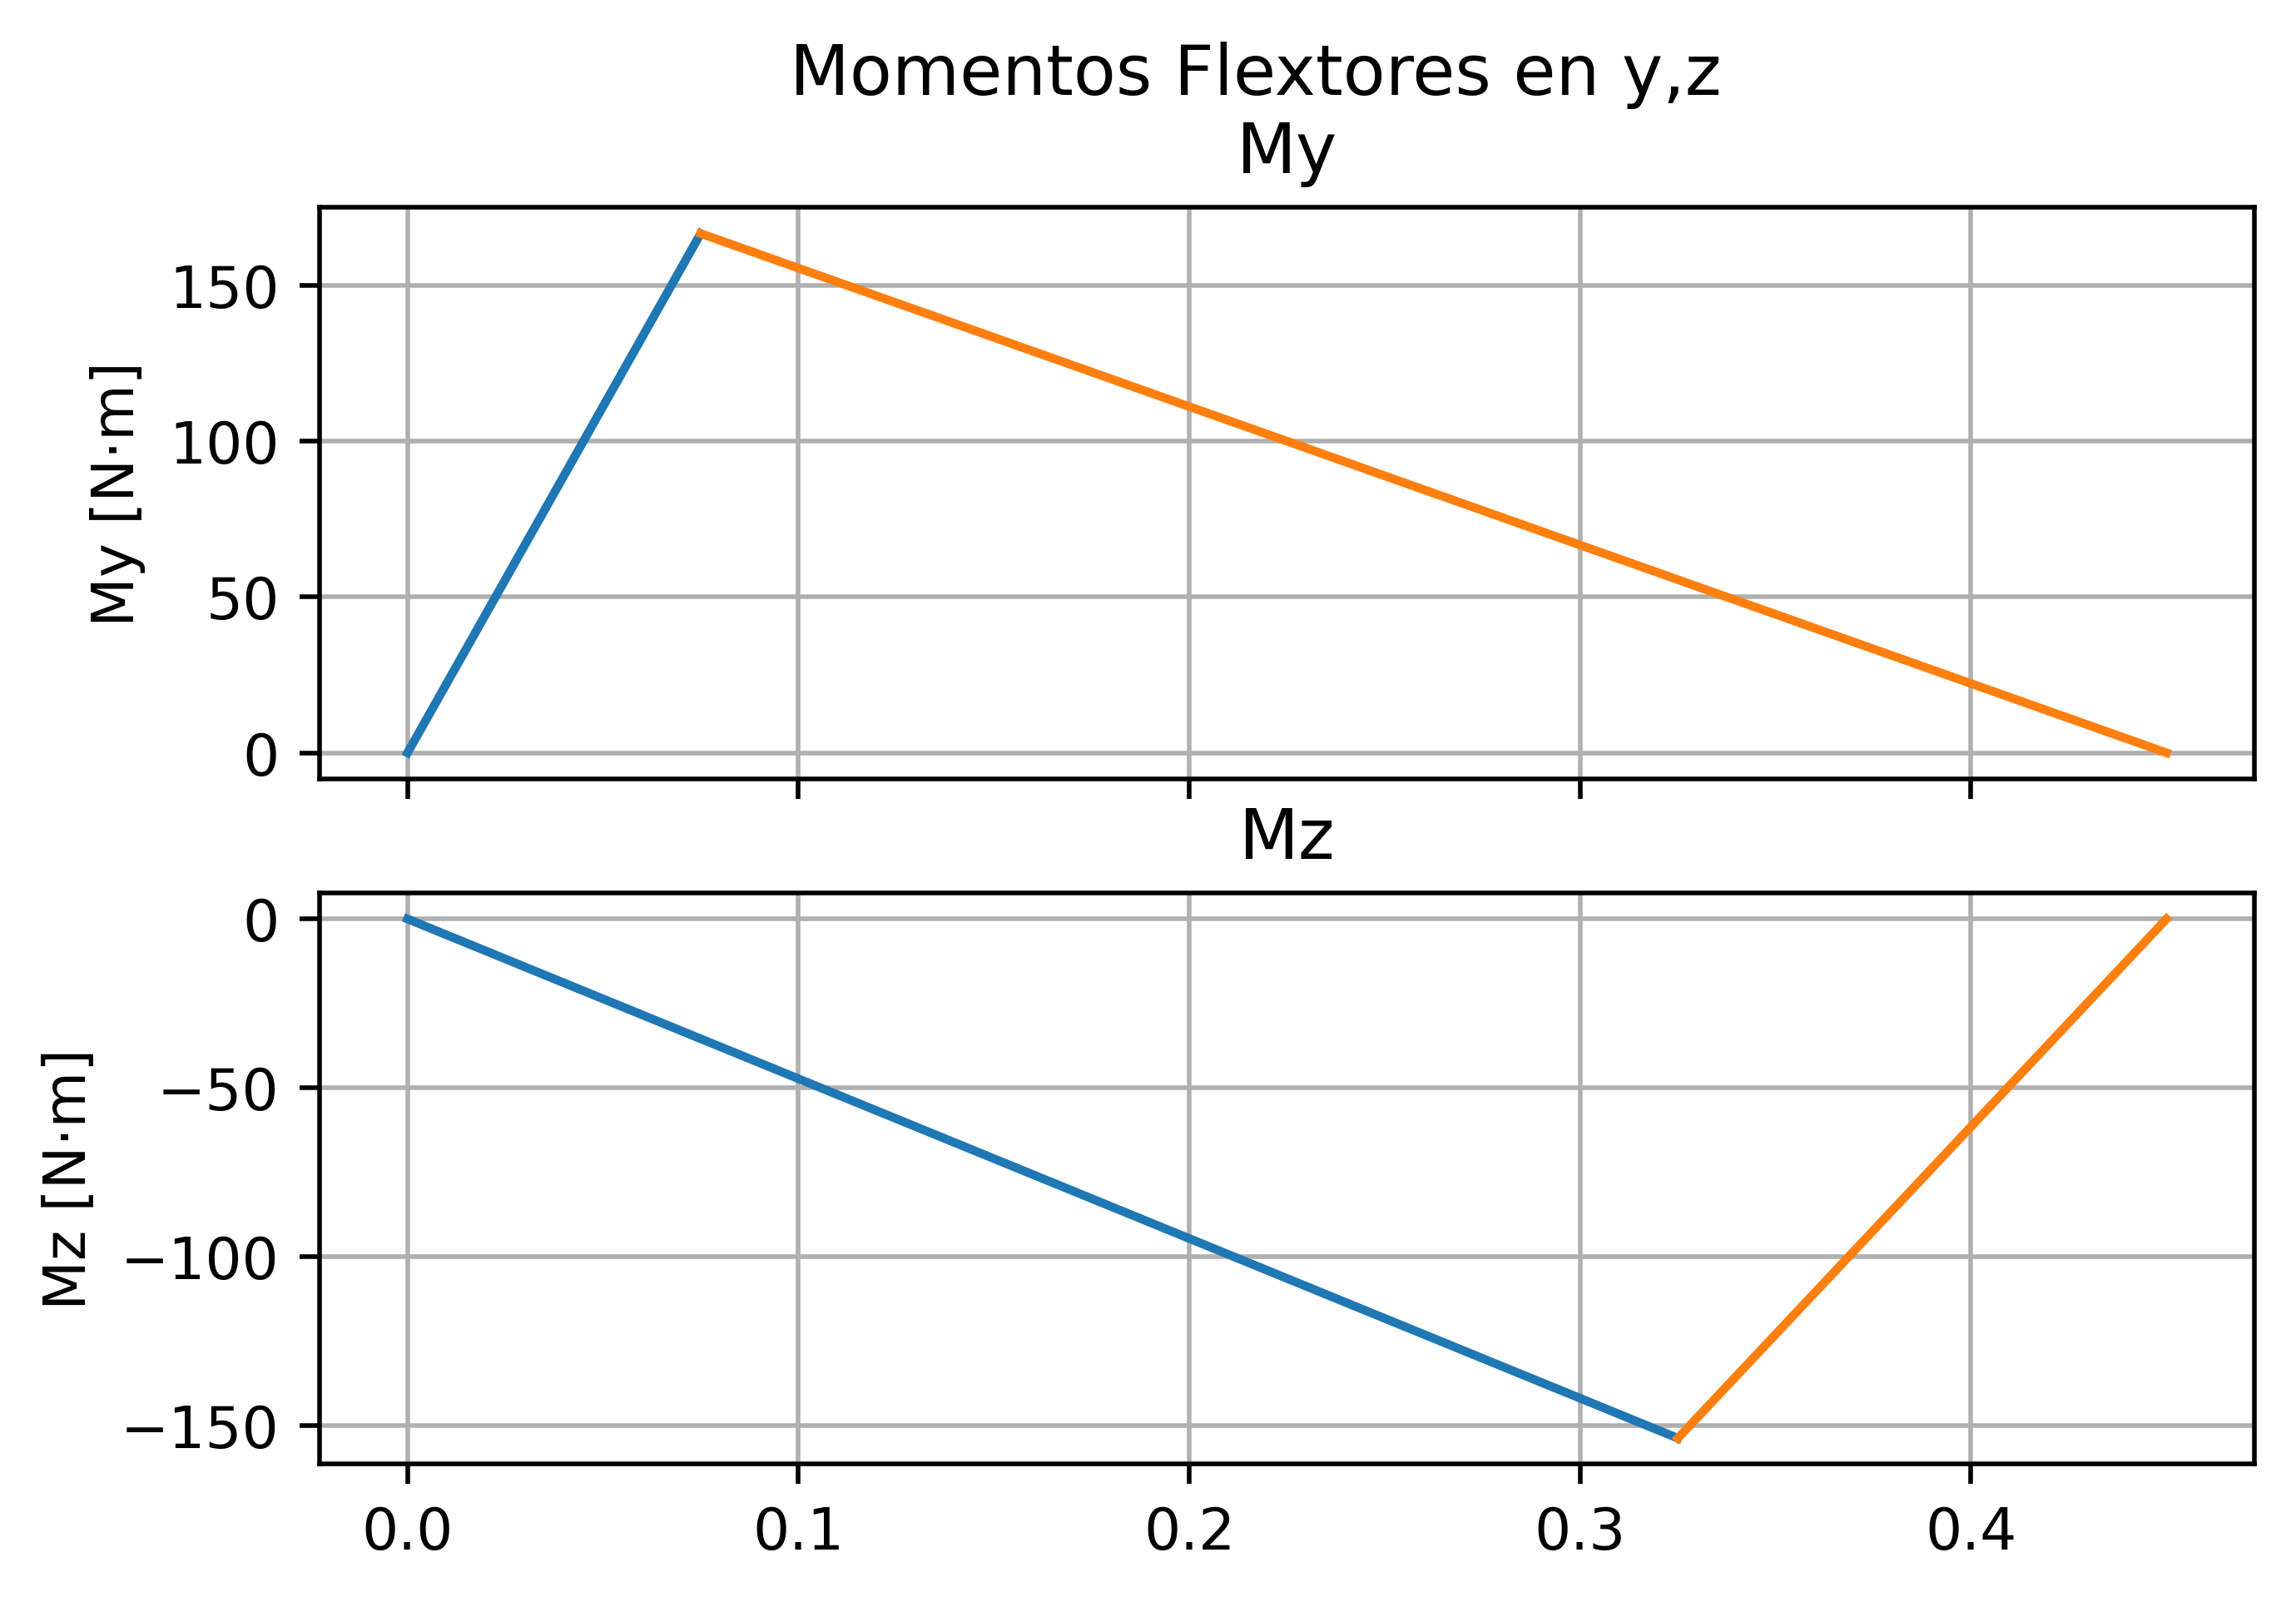

In [58]:
x1 = np.linspace(0,e,50)
x2 = np.linspace(e,e+f+g,50)
X1 = np.linspace(0,e+f,50)
X2 = np.linspace(e+f,e+f+g,50)
fig,ax = plt.subplots(2, sharex=True)
fig.dpi=500
fig.suptitle('Momentos Flextores en y,z')
ax[0].plot(x1,My1(x1),x2,My2(x2))
ax[0].grid(True)
ax[0].set_title('My')
ax[0].set_ylabel('My [N·m]')
ax[1].plot(X1,Mz1(X1),X2,Mz2(X2))
ax[1].grid(True)
ax[1].set_title('Mz')
ax[1].set_ylabel('Mz [N·m]')
fig.show()


In [60]:
print(max(My1(x1)),min(Mz1(X2)))
MY = max(My1(x1))
MZ = abs(min(Mz1(X2)))

166.66666666666666 -212.83555449518238


Los anteriores valores impresos hacen referencia a los momentos mayores en ambos ejes. En el eje $y$ se encuentra un momento positivo, mientras que en el eje $z$ se tienen valores negativos. Los esfuerzos asociados a estos momentos críticos se tienen con la fórmula:
\begin{equation}
    \sigma_{max} = \frac{M_{max}r}{I_p}
\end{equation}
Ahora se calcularán los esfuerzos críticos.

In [63]:
d = 30/1000
r = d/2
I = np.pi*(d**4)/64
max_y, max_z = MY*r/I , MZ*r/I
print('El esfuerzo máximo por flexión es dado en x=e para el eje Y y tiene un valor de',max_y*1e-6,'MPa')
print('El esfuerzo máximo por flexión es dado en x=e+f para el eje Z y tiene un valor de',max_z*1e-6,'MPa')

El esfuerzo máximo por flexión es dado en x=e para el eje Y y tiene un valor de 62.87602690050185 MPa
El esfuerzo máximo por flexión es dado en x=e+f para el eje Z y tiene un valor de 80.2935242989339 MPa


Por otro lado, el máximo esfuerzo cortante por torsión está en el punto C, y el valor está dado por:
\begin{equation}
    \tau_{max} = \frac{rT}{J}
\end{equation}

In [65]:
J = I/2
tau_max = 0.125*200/J
print('El esfuerzo máximo por torsión es de',tau_max*1e-6,'Mpa')

El esfuerzo máximo por torsión es de 1257.5205380100374 Mpa


# Accesorio de transportador

Para desarrollar este ejercicio utilizamos la gráfica para concentradores de esfuerzos en barras cilindricas con cargas axiales

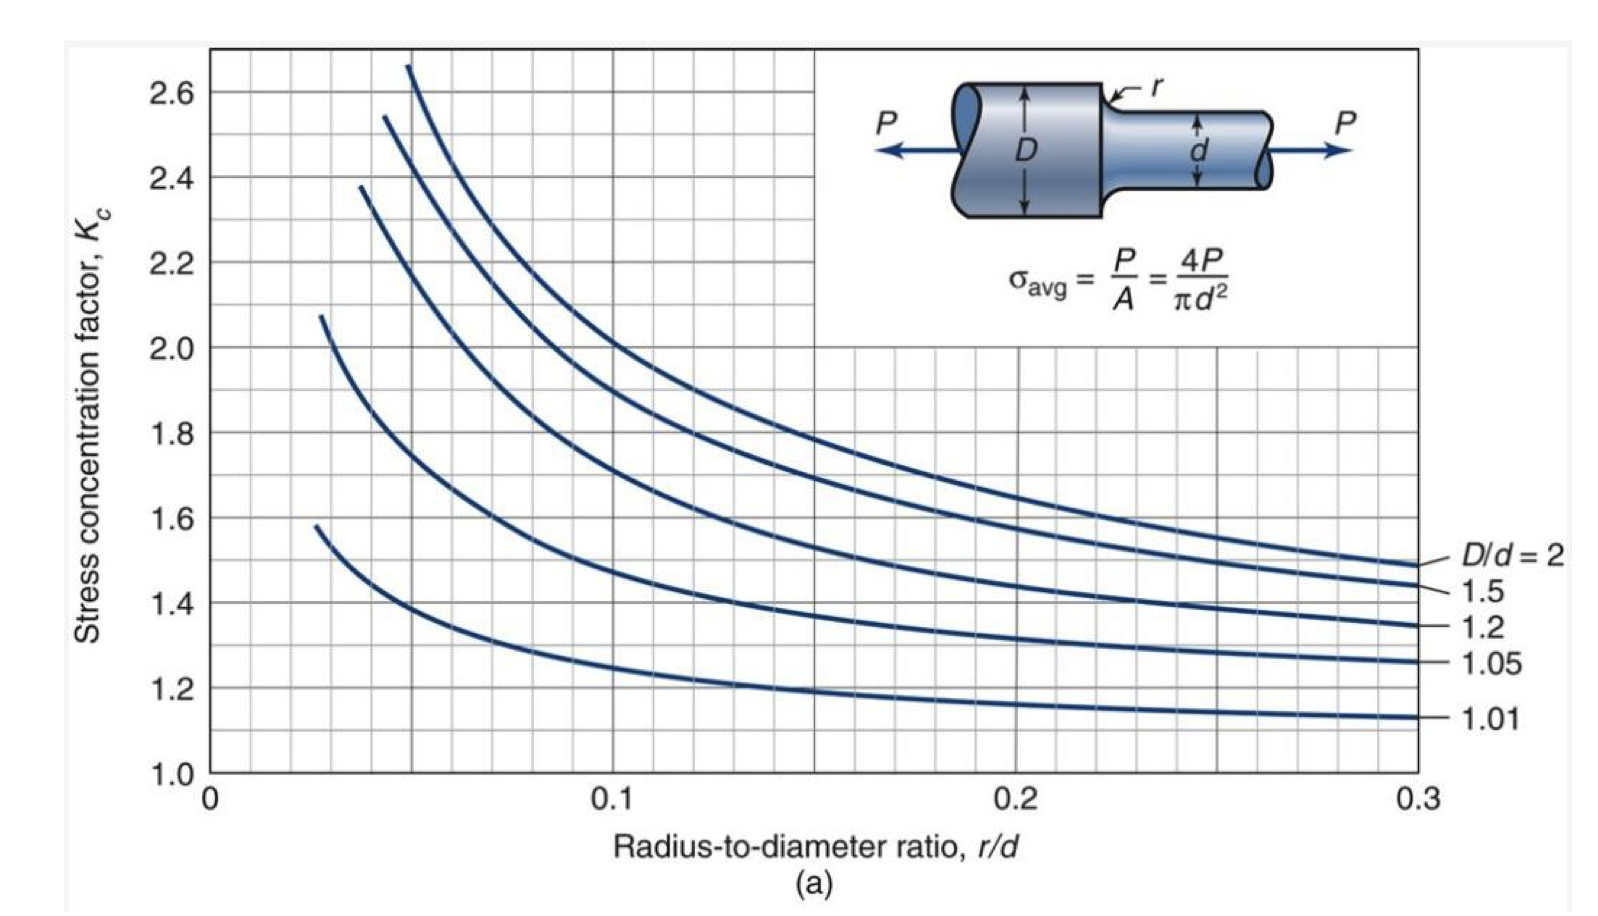

In [2]:
from IPython.display import Image
Image(filename= 'Imagenes Tareas/Concentrador Esfuerzos.png')

**Primer Tramo**

In [5]:
esfuerzos=[]
d_ratio = 2 #ratio entre los diámetros
Sigma_0 = 1.2*4/(np.pi * (1**2)) # Esfuerzo nominal en ksi
r_ratio = 0.08 # ratio r/d
K = 2.18
esfuerzos.append(Sigma_0/K)

**Segundo Tramo**

In [6]:
d_ratio = 2/0.75
Sigma_0 = 1.2*4/(np.pi * (0.75**2))
r_ratio = 0.08/0.75
print(d_ratio,r_ratio)

2.6666666666666665 0.10666666666666667


Como el valor de $D/d =2.67$ no está en la gráfica, se tomó el valor del sitio _e-funda_. Dando un valor de $K_c = 1.98 $ 

In [7]:
esfuerzos.append(Sigma_0*1.98)

**Tercer Tramo**

De nuevo, el valor de la razón entre diámetros $D/d$ es mayor al disponible en la gráfica, entonces volvemos a usar el sitio _e-funda_. $K_c$ = 1.78

In [8]:
Sigma_0 = 1.2*4/(np.pi * (0.5**2))
esfuerzos.append(Sigma_0*1.78)

In [9]:
print('El esfuerzo máximo es de',max(esfuerzos),'ksi')

El esfuerzo máximo es de 10.87855867021723 ksi


# Cilindro presurizado con diferentes modelos

Como el valor de $R_i/t =0.3 > 0.1$ se tiene que el modelo más realista es el de pared gruesa. El esfuerzo máximo se encuentra en los bordes del radio exterior. Tomando la presión externa como cero, tenemos las siguientes expresiones:

\begin{equation}
    \sigma_t = 2 \times \frac{r_i^2 P}{r_0^2 - r_1^2}
\end{equation}

\begin{equation}
    \sigma_l = \frac{r_i^2 P}{r_0^2 - r_1^2}
\end{equation}



Ahora se calcularan estos valores, y con estos, el esfuerzo cortante máximo, usando mi módulo _stressTransformations_ utilizado en tareas pasadas

In [10]:
p = 100e+6
ri = 0.15
ro = 0.2 
s_t = 2*((ri**2)*p/(ro**2 - ri**2))
s_l = s_t / 2
t_max = st.TauMax(s_t,s_l,0)/1e6
print('El esfuerzo cortante en estas condiciones es de',t_max,'MPa')

El esfuerzo cortante en estas condiciones es de 64.28571428571425 MPa


Usando el modelo de pared delgada, se tienen las expresiones:

\begin{equation}
    \sigma_t = \frac{P(d_i + t)}{2 t}
\end{equation}

\begin{equation}
    \sigma_l = \frac{P(d_i)}{4 t}
\end{equation}

In [11]:
t = 0.05
s_t2 = p*(2*ri+t)/(2*t)
s_l2 = p*2*ri/(4*t)
t_max2 = st.TauMax(s_t2,s_l2,0)/1e+6
print('El esfuerzo cortante asumiendo pared delgada es de',t_max2,'MPa')
error = abs(t_max - t_max2)/t_max2

El esfuerzo cortante asumiendo pared delgada es de 100.0 MPa


Comparando los modelos de pared plana y de pared gruesa, se deduce que son valores que difieren en un 35% aproximadamente. Entonces los supuestos de pared delgada son importantes para consideraciones de diseño

# Acero AISI 1040

Se tiene un esfuerzo de fluencia $S_y$ de 415 MPa. Como el mayor esfuerzo en esta sitaución es el tangencial, y tomando una presión interna como cero, la expresión para la presión externa es:
\begin{equation}
   P_0 = \frac{0.8 S_y (R_i^2 - R_o^2)}{2 R_0^2}
\end{equation}

In [12]:
Sy = 415e+6
Ri = 19/1000
Ro = 25/1000

P = 0.8*Sy*((Ri**2) - (Ro**2))/(2*(Ro**2))
print('La presión necesaria es de',P/1e+6,'MPa')

La presión necesaria es de -70.11840000000001 MPa


# Prensa Hidráhulica en C

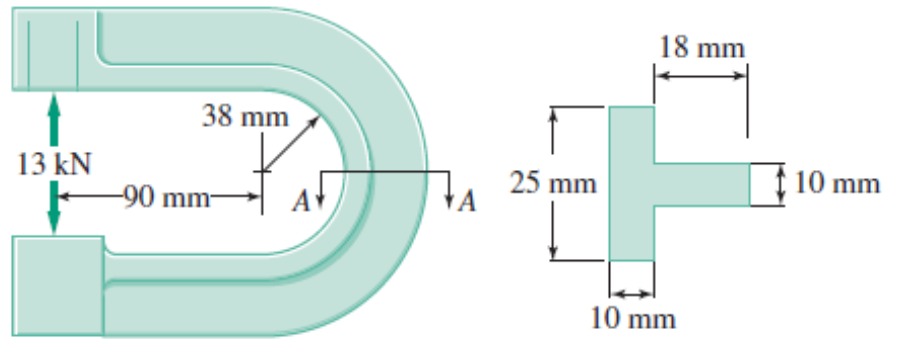

In [13]:
from IPython.display import Image
from scipy.integrate import quad
Image(filename='Imagenes Tareas/Prensa C.png')

En primer lugar, para encontrar el eje neutro sobre la sección A-A (lugar donde por simetría, es donde se encuentra el esfuerzo máximo) se debe encontrar el eje neutro de momento flector. 

Para empezar, el área en función de la distancia radial $r$ está dada por:

\begin{equation}

A(r) =
    \begin{cases} 
      25 r & r \in [38,48] \\
      250 + 10 r &  r \in (48,66] \\
   \end{cases}
\end{equation}

La localización del eje neutro está dado por la siguiente expresión:

\begin{equation}
   r_n = \frac{A}{\int_{38}^{48} \frac{25 dr}{r} + \int_{48}^{66}\frac{10 dr}{r}}
\end{equation}

In [14]:
# Datos
ri = 38
ro = 66
A = 25*10 + 18*10
# Funciones a Integrar:
r1 = lambda r: 25/r
r2 = lambda r: 10/r
# Integraciones:
i1 = quad(r1,38,48)[0]
i2 = quad(r2,48,66)[0] 
r_n = A/(i1+i2)
print('El radio neutro es de',r_n)

El radio neutro es de 47.645911942200975


El centroide geométrico es un ponderado de las dos partes del área transversal.

In [15]:
A = 25*10 + 18*10
r_c = ri + (25*100 + 2*10*10*18 + 10*(18**2))/(2*A)
print('El radio de centroide es de',r_c)

El radio de centroide es de 48.86046511627907


A continuación se encontrará la función del esfuerzo y se encontrará el valor maximo

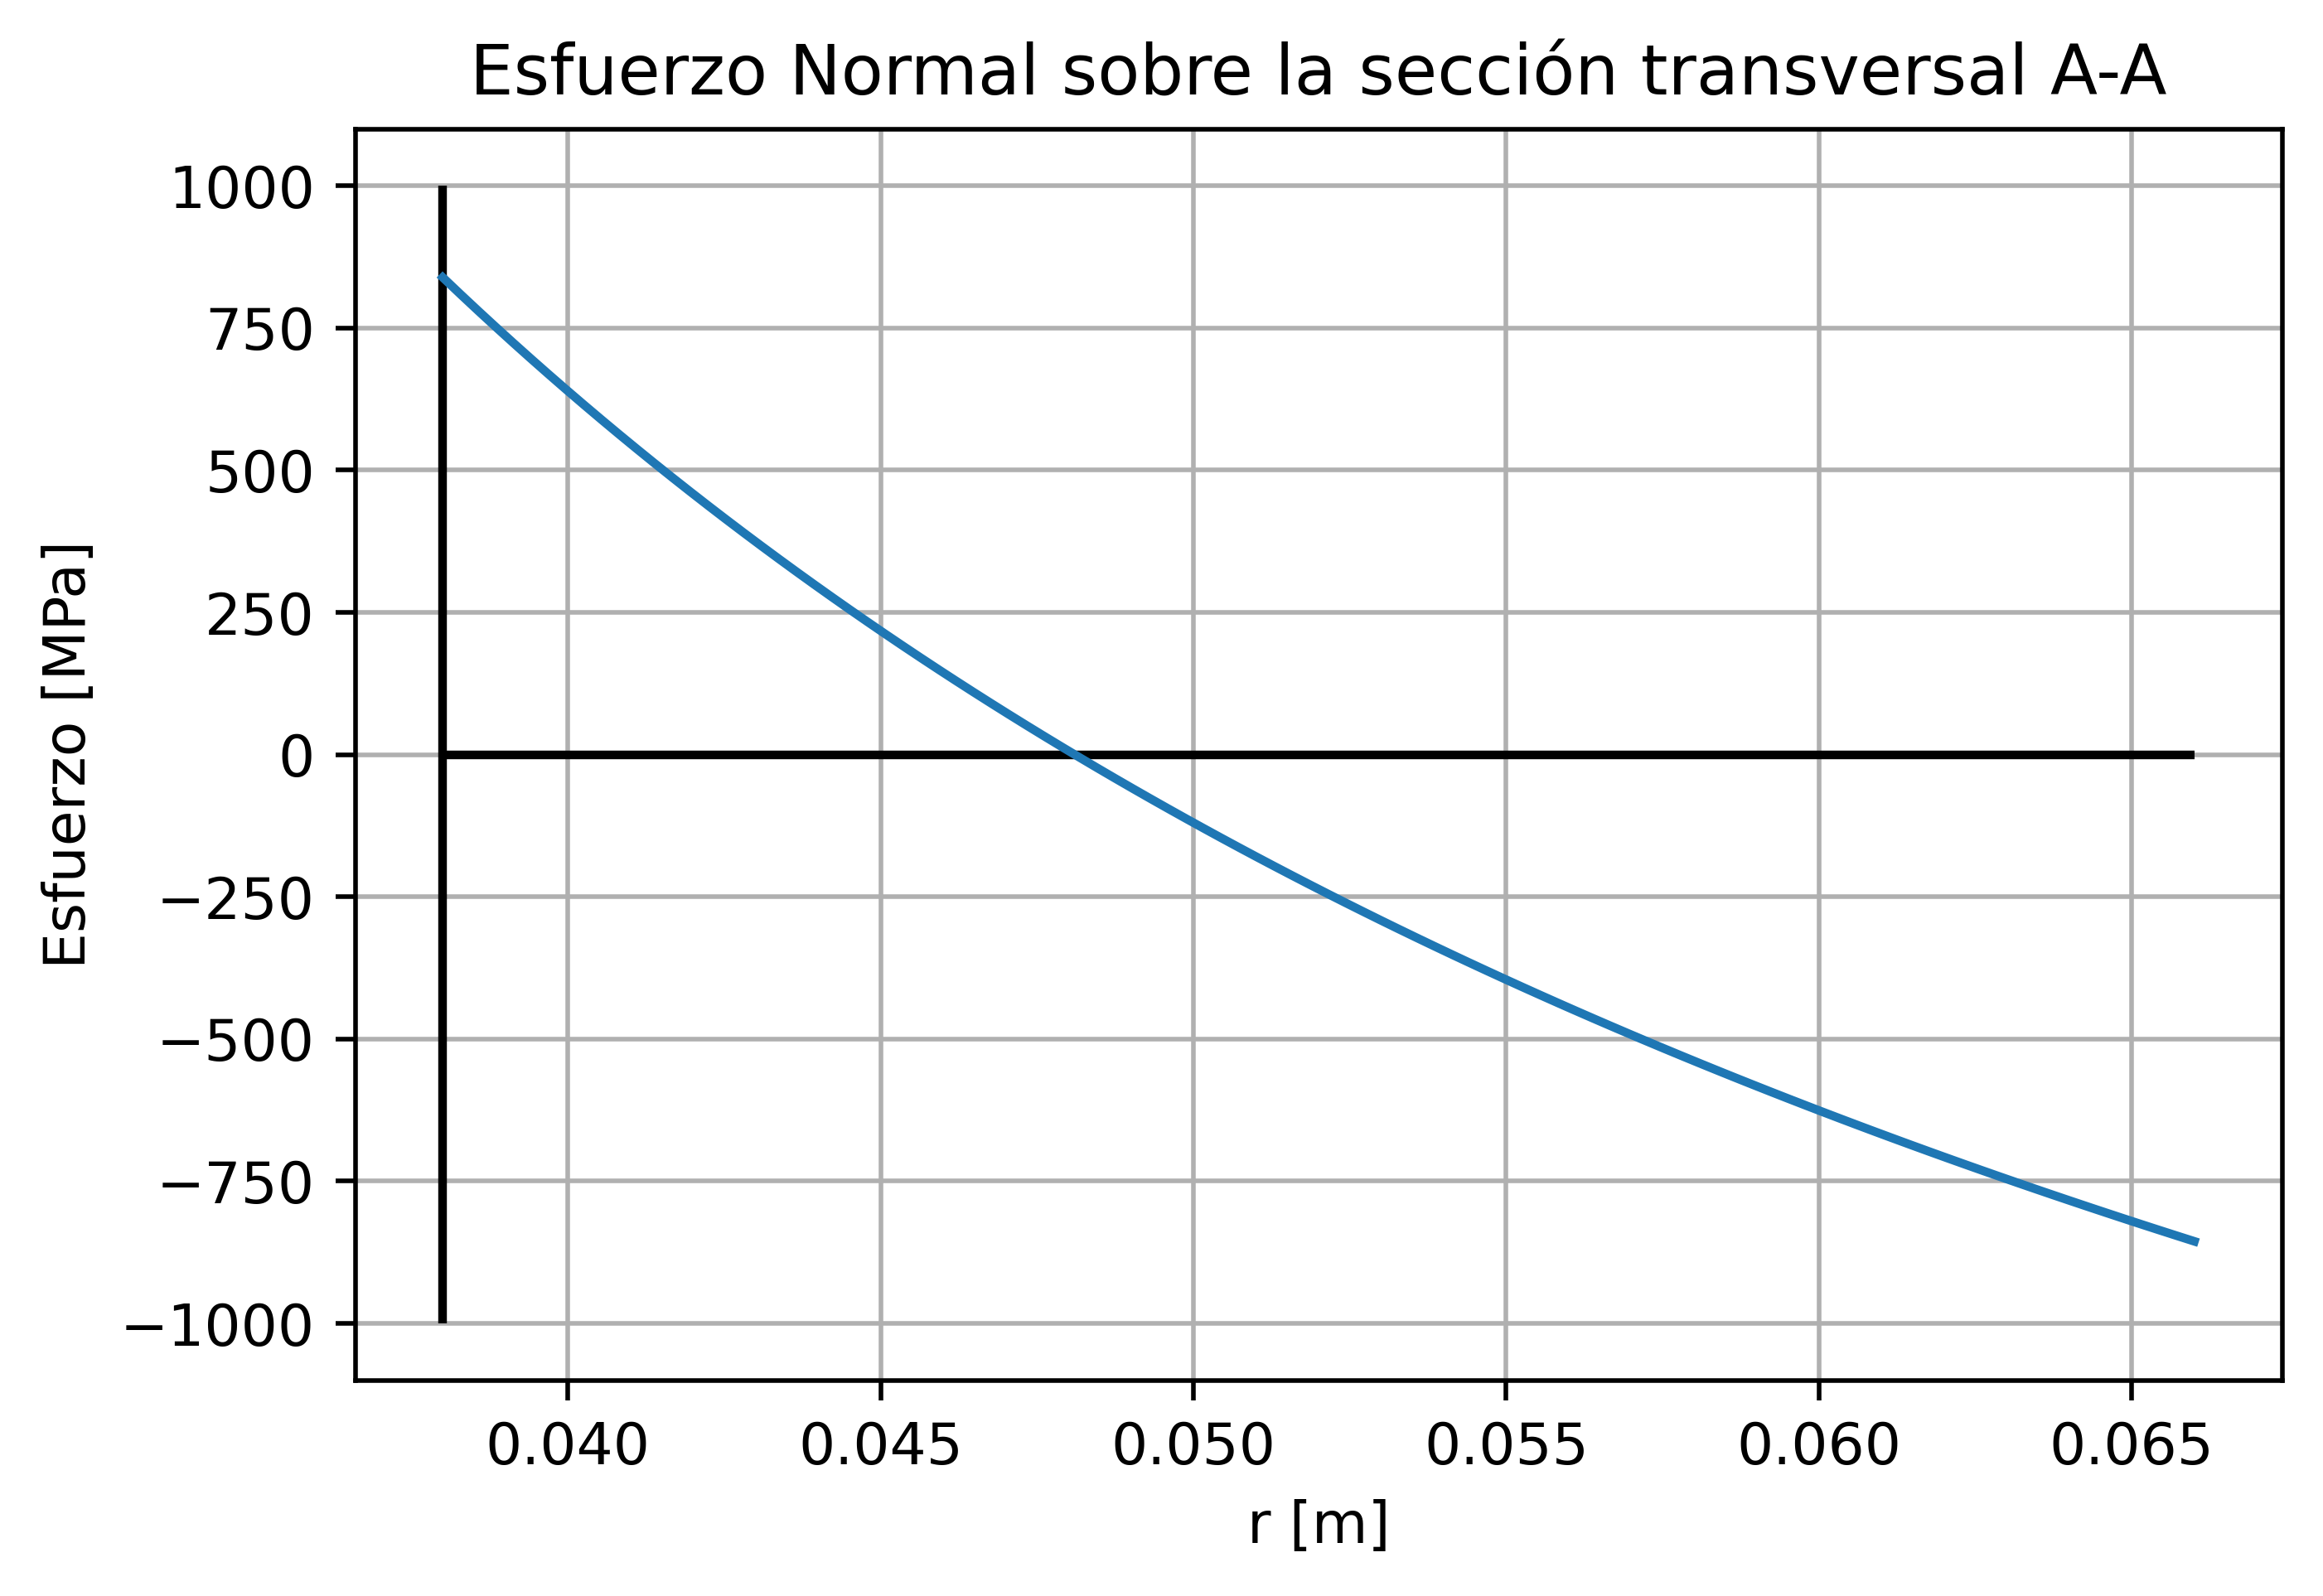

In [16]:
A_metros = A/1e+6
r_n_metros = r_n/1000
e = abs(r_c - r_n)/1000
Mo = 13000*0.128
S_n = 13000/A_metros # Esfuerzo normal debido a la carga interna
sigma = lambda r: S_n + (Mo* (r_n_metros - r)/(A_metros*e*r))
x = np.linspace(38/1000,66/1000,100)
plt.figure(dpi=500)
plt.hlines(0,min(x),max(x),'k')
plt.vlines(min(x),-1000,1000,'k')
plt.title('Esfuerzo Normal sobre la sección transversal A-A')
plt.ylabel('Esfuerzo [MPa]')
plt.xlabel('r [m]')
plt.plot(x,sigma(x)/1e+6)
plt.grid(True)
plt.show()

Los puntos máximos y mínimos de la gráfica son:

In [17]:
y = sigma(x)
print(max(y)/1e6,min(y)/1e6)

839.0081373673191 -855.8153580194848


El valor crítico, al tener un punto de magnitud máxima negativa, se tiene que es de un valor de compresión, y sin superar el valor máximo tenemos que la pieza no falla por compresión. Por otro lado, considerando el esfuerzo máximo por tracción, el cual tiene un valor de al rededor de 450 MPa, se deduce que la prensa si falla por tensión. 

# Dos cilindros en contacto

De acuerdo con la figura 3-39 del libro se tiene que la magnitud máxima es en el eje z. Entonces tenemos que resolver la formula del esfuerzo $\sigma_z$.

\begin{equation}
    \sigma_z = \frac{ -p_{max} }{\sqrt{1+z^2/b^2}}
\end{equation}

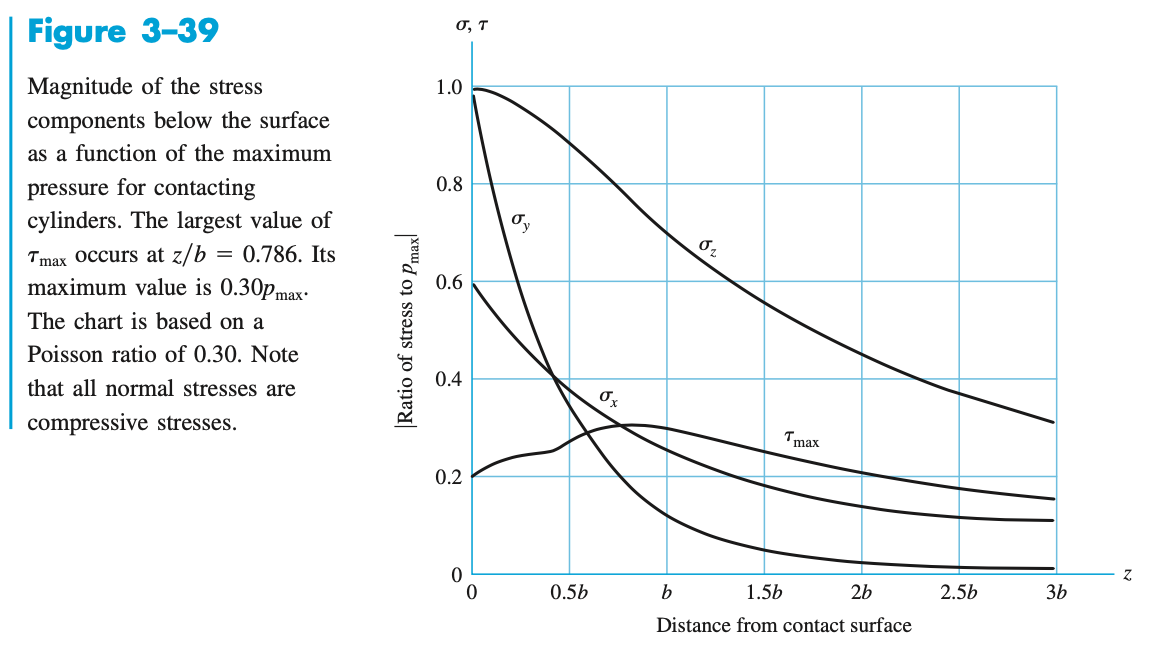

In [18]:
Image(filename='Imagenes Tareas/Esfuerzos Cilindro.png')

Como el esfuerzo máximo está en $z/b =0$ se tiene que para la ecuación anterior el esfuerzo se evalúa en $\sigma_z |_{z=0}$, lo que se traduce en que el esfuerzo máximo tiene el valor de $-p_{max}$ 

Entonces, teniendo en cuenta las magnitudes, tenemos que resolver la siguiente función compuesta:

\begin{equation}
    p_{max} = \frac{2F}{b(F) \times (\pi L) }
\end{equation}

Despejando esta función compuesta se llega a le expresión:
\begin{equation}
    F = \frac{\pi L \sigma^2(1-\nu^2)}{E(1/d_1 + 1 /d_2)}
\end{equation}

In [19]:
E = 200e9
L = 0.25
d1 = 0.2*2
d2 = 0.3*2
v = 0.25 
S = 200e6

F = (S**2)*np.pi*(L)*(1-(v**2))/(E* (1/d1 + 1/d2) )
print('Tras la resolución de la ecuación, se tiene que el valor de F corresponde a no más de',F/1000,'kN')

Tras la resolución de la ecuación, se tiene que el valor de F corresponde a no más de 35.34291735288517 kN
